<a href="https://colab.research.google.com/github/Jaiprakashnag/Hotel-Booking-EDA/blob/main/Hotel_Booking_Eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
#Import required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


In [68]:
#Loading data into collab
hotel_data = pd.read_csv("/content/Hotel Bookings.csv")

In [69]:
data = hotel_data
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [70]:
#Shape of the loaded data-set
data.shape

(119390, 32)

In [71]:
#Data preparation and checking for missing/null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [72]:
#After checking data company column had only 6797 not null values therefore replacing null values with "Others" in company column
data.fillna(0, inplace = True)

In [74]:
data_1 = data[(data['children']==0) & (data['adults']==0) & (data['babies']==0)]
data_1[['children','adults','babies']]

Delete = (df['children']==0) & (df['adults']==0) & (df['babies']==0)
df=data[~Delete]

<ipython-input-74-72e40d788a7d>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [75]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,No. of Bookings,adr_updated
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Others,0,Transient,0.00,0,0,Check-Out,2015-07-01,1,0.000000
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Others,0,Transient,0.00,0,0,Check-Out,2015-07-01,1,0.000000
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Others,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,75.000000
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Others,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,75.000000
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Others,0,Transient,98.00,0,1,Check-Out,2015-07-03,1,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Others,0,Transient,96.14,0,0,Check-Out,2017-09-06,1,48.070000
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Others,0,Transient,225.43,0,2,Check-Out,2017-09-07,1,75.143333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Others,0,Transient,157.71,0,4,Check-Out,2017-09-07,1,78.855000
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Others,0,Transient,104.40,0,0,Check-Out,2017-09-07,1,52.200000


In [76]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,No. of Bookings,adr_updated
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Others,0,Transient,0.0,0,0,Check-Out,2015-07-01,1,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Others,0,Transient,0.0,0,0,Check-Out,2015-07-01,1,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Others,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Others,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Others,0,Transient,98.0,0,1,Check-Out,2015-07-03,1,49.0


In [77]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,No. of Bookings,adr_updated
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Others,0,Transient,96.14,0,0,Check-Out,2017-09-06,1,48.070000
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Others,0,Transient,225.43,0,2,Check-Out,2017-09-07,1,75.143333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Others,0,Transient,157.71,0,4,Check-Out,2017-09-07,1,78.855000
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Others,0,Transient,104.40,0,0,Check-Out,2017-09-07,1,52.200000
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Others,0,Transient,151.20,0,2,Check-Out,2017-09-07,1,75.600000


In [78]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,No. of Bookings,adr_updated
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,...,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.0,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,...,0.087191,0.137094,0.218799,74.889078,2.321215,101.969092,0.062553,0.571504,1.0,55.125534
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,...,0.844918,1.498137,0.638504,107.168884,17.598002,50.434007,0.245360,0.792876,0.0,29.073020
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,1.0,-3.190000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.000000,0.000000,69.500000,0.000000,0.000000,1.0,37.500000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,94.950000,0.000000,0.000000,1.0,49.500000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000,1.0,66.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,18.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,1.0,2700.000000


In [79]:
df.value_counts('meal')

meal
BB           92236
HB           14458
SC           10549
Undefined     1169
FB             798
dtype: int64

Question 1) Which hotel type is more preferred?

In [80]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,119380,119381,119382,119383,119384,119385,119386,119387,119388,119389
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,...,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
lead_time,342,737,7,13,14,14,0,9,85,75,...,44,188,135,164,21,23,102,34,109,205
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
arrival_date_month,July,July,July,July,July,July,July,July,July,July,...,August,August,August,August,August,August,August,August,August,August
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27,...,35,35,35,35,35,35,35,35,35,35
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1,...,31,31,30,31,30,30,31,31,31,29
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,2,2
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3,...,3,3,4,4,5,5,5,5,5,7
adults,2,2,1,1,2,2,2,2,2,2,...,2,2,3,2,2,2,3,2,2,2


In [81]:
df['No. of Bookings'] =1


<Figure size 2000x1500 with 0 Axes>

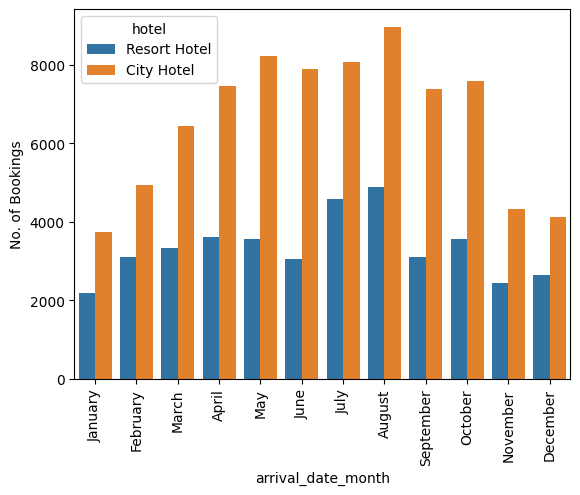

<Figure size 2000x1500 with 0 Axes>

In [123]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['No. of Bookings'] =1
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=months, ordered=True)
fig= sns.barplot(x= 'arrival_date_month', y= 'No. of Bookings', hue= df['hotel'], estimator= sum, data= df)
plt.xticks(rotation = 90)
plt.figure(figsize=(20,15))

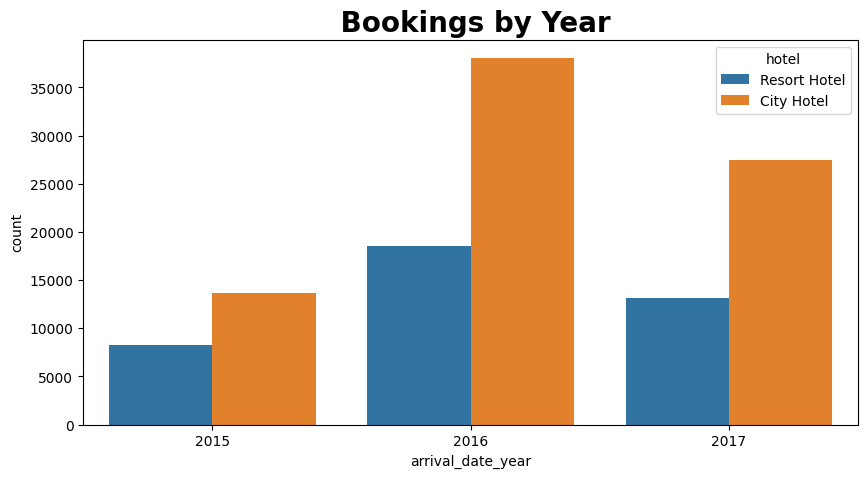

In [122]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=months, ordered=True)
plt.figure(figsize = (10,5))
fig=sns.countplot(x= 'arrival_date_year', data= df, hue= 'hotel').set_title (' Bookings by Year',fontweight="bold", size = '20')


In [84]:
guest = df[df['is_canceled']==0]['country'].value_counts()
guest

PRT    20977
GBR     9668
FRA     8468
ESP     6383
DEU     6067
       ...  
BHR        1
DJI        1
MLI        1
NPL        1
FRO        1
Name: country, Length: 166, dtype: int64

In [85]:
guest = df[df['is_canceled']==0]['country'].value_counts().reset_index()
guest.columns=['Country', 'No of guests']
guest

,Country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [86]:
import plotly.offline as po
import plotly.graph_objs as go
import plotly.express as px 

In [87]:
map = px.choropleth(guest, 
                    locations = guest['Country'],
                    color = guest['No of guests'],
                    hover_name = guest['Country'],
                    title = "Home Country of Guest's",
                    )
map.show()

In [88]:
total_guest = guest['No of guests'].sum()
guest['Guest in %']= round(guest['No of guests']/total_guest*100,2)
guest


,Country,No of guests,Guest in %
0,PRT,20977,27.97
1,GBR,9668,12.89
2,FRA,8468,11.29
3,ESP,6383,8.51
4,DEU,6067,8.09
...,...,...,...
161,BHR,1,0.00
162,DJI,1,0.00
163,MLI,1,0.00
164,NPL,1,0.00


Question 4) Adr per person


In [89]:

df['adr_updated']= df['adr']/(df['adults']+df['children'])
city = df[(df['hotel']== 'City Hotel') & (df['is_canceled']==0)]
city

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,No. of Bookings,adr_updated
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,Others,0,Transient,0.00,0,0,Check-Out,2015-07-03,1,0.000000
40066,City Hotel,0,3,2015,July,27,2,0,3,1,...,Others,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05,1,58.670000
40070,City Hotel,0,43,2015,July,27,3,0,2,2,...,Others,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05,1,43.000000
40071,City Hotel,0,43,2015,July,27,3,0,2,2,...,Others,0,Transient-Party,43.00,0,0,Check-Out,2015-07-05,1,21.500000
40072,City Hotel,0,43,2015,July,27,3,0,2,2,...,Others,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05,1,43.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Others,0,Transient,96.14,0,0,Check-Out,2017-09-06,1,48.070000
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Others,0,Transient,225.43,0,2,Check-Out,2017-09-07,1,75.143333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Others,0,Transient,157.71,0,4,Check-Out,2017-09-07,1,78.855000
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Others,0,Transient,104.40,0,0,Check-Out,2017-09-07,1,52.200000


In [90]:
resort = df[(df['hotel']== 'Resort Hotel') & (df['is_canceled']==0)]
resort

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,No. of Bookings,adr_updated
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Others,0,Transient,0.00,0,0,Check-Out,2015-07-01,1,0.000000
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Others,0,Transient,0.00,0,0,Check-Out,2015-07-01,1,0.000000
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Others,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,75.000000
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Others,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,75.000000
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Others,0,Transient,98.00,0,1,Check-Out,2015-07-03,1,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,Others,0,Transient,89.75,0,0,Check-Out,2017-09-10,1,29.916667
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,Others,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10,1,101.135000
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,Others,0,Transient,153.57,0,3,Check-Out,2017-09-12,1,76.785000
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,Others,0,Contract,112.80,0,1,Check-Out,2017-09-14,1,56.400000


In [94]:
city_hotel = city.groupby(['arrival_date_month'])['adr_updated'].mean().reset_index().round(2)
city_hotel

,arrival_date_month,adr_updated
0,January,51.28
1,February,50.95
2,March,52.48
3,April,58.72
4,May,69.99
5,June,66.34
6,July,57.26
7,August,57.77
8,September,67.04
9,October,61.80


In [95]:
resort_hotel = resort.groupby(['arrival_date_month'])['adr_updated'].mean().reset_index().round(2)
resort_hotel

,arrival_date_month,adr_updated
0,January,31.17
1,February,30.85
2,March,34.10
3,April,43.73
4,May,42.25
5,June,56.35
6,July,70.26
7,August,83.32
8,September,50.37
9,October,35.14


In [98]:
room_rate= resort_hotel.merge(city_hotel, on='arrival_date_month')
room_rate
room_rate.columns=['Months', 'Rate_for_Resort','Rate_for_City_Hotel']
room_rate

,Months,Rate_for_Resort,Rate_for_City_Hotel
0,January,31.17,51.28
1,February,30.85,50.95
2,March,34.10,52.48
3,April,43.73,58.72
4,May,42.25,69.99
5,June,56.35,66.34
6,July,70.26,57.26
7,August,83.32,57.77
8,September,50.37,67.04
9,October,35.14,61.80


In [119]:
fig=px.line(room_rate, x='Months', y = ['Rate_for_Resort','Rate_for_City_Hotel'], title = 'Rate of Rooms per Night per Person')
fig.show()